# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

294

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="
query_url

'http://api.openweathermap.org/data/2.5/weather?appid=e3ccf44e02cf0a5895ed131fd26f64b2&units=imperial&q='

In [4]:
weather_response = requests.get(query_url + city)
weather_json = weather_response.json()
pprint(weather_json)

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 19.7297, 'lon': -155.09},
 'dt': 1644342689,
 'id': 5855927,
 'main': {'feels_like': 63.95,
          'humidity': 80,
          'pressure': 1019,
          'temp': 64.08,
          'temp_max': 68.25,
          'temp_min': 62.33},
 'name': 'Hilo',
 'sys': {'country': 'US',
         'id': 7881,
         'sunrise': 1644339167,
         'sunset': 1644380184,
         'type': 1},
 'timezone': -36000,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 230, 'speed': 6.91}}


In [5]:
# set up lists to hold reponse info
thiscity = []
lat = []
lon = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

# Loop through the list of cities and perform a request for data on each
for idx, city in enumerate(cities):
    try:
        response = requests.get(query_url + city).json()
        thiscity.append(response['name'])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])                  
        print(f"Weather check for city {idx}: {city}")
    
    except:
        print(f"Missing result... city {idx}: {city} NOT FOUND")

Weather check for city 0: kruisfontein
Weather check for city 1: ushuaia
Weather check for city 2: kharp
Weather check for city 3: pevek
Weather check for city 4: saint-pierre
Weather check for city 5: alamos
Weather check for city 6: qaanaaq
Weather check for city 7: khatanga
Missing result... city 8: illoqqortoormiut NOT FOUND
Weather check for city 9: rawson
Weather check for city 10: saskylakh
Weather check for city 11: bor
Weather check for city 12: busselton
Weather check for city 13: mar del plata
Weather check for city 14: atherton
Weather check for city 15: mataura
Weather check for city 16: parrita
Missing result... city 17: kollumerland NOT FOUND
Weather check for city 18: kavieng
Weather check for city 19: rikitea
Weather check for city 20: tabas
Weather check for city 21: east london
Weather check for city 22: geraldton
Weather check for city 23: vaini
Weather check for city 24: muros
Weather check for city 25: banda aceh
Weather check for city 26: belmonte
Weather check f

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
print(len(thiscity))
print(len(lat))
print(len(lon))
print(len(max_temp))

263
263
263
263


In [12]:
# create the data frame
weather_dict = {
    'city': thiscity,
    'lat': lat,
    'lon': lon,
    'max temp': max_temp,
    'humidity': humidity,
    'cloudiness': cloudiness,
    'wind speed': wind_speed,
    'country': country,
    'date': date
}
city_df = pd.DataFrame(weather_dict)
city_df.head(30)

,city,lat,lon,max temp,humidity,cloudiness,wind speed,country,date
0,Kruisfontein,-34.0033,24.7314,65.88,61,4,3.40,ZA,1644342972
1,Ushuaia,-54.8000,-68.3000,56.82,58,40,23.02,AR,1644342951
2,Kharp,66.8014,65.8081,-10.43,100,100,2.91,RU,1644342972
3,Pevek,69.7008,170.3133,-32.08,100,73,5.26,RU,1644342973
4,Saint-Pierre,-21.3393,55.4781,78.48,83,0,2.30,RE,1644342973
5,Álamos,27.0167,-108.9333,76.06,12,0,1.43,MX,1644342973
6,Qaanaaq,77.4840,-69.3632,-11.04,94,100,4.99,GL,1644342974
7,Khatanga,71.9667,102.5000,2.70,78,100,17.90,RU,1644342974
8,Rawson,-43.3002,-65.1023,69.64,56,96,19.89,AR,1644342975
9,Saskylakh,71.9167,114.0833,-1.46,87,100,12.84,RU,1644342975


In [8]:
# export to a CSV
city_df.to_csv(output_data_file)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [11]:
#  Get the indices of cities that have humidity over 100%.
high_humidity_df = city_df[(city_df['humidity'] > 100)]
high_humidity_df.index

Int64Index([], dtype='int64')

In [14]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

#clean_city_df = city_df.join(high_humidity_df, how='outer')
#clean_city_df = pd.merge(city_df, high_humidity_df, on=index)
#clean_city_df

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [15]:
# date of analysis
find_date = city_df["date"][0]
run_date = pd.to_datetime(find_date, unit='s')
run_date

Timestamp('2022-02-08 17:56:12')

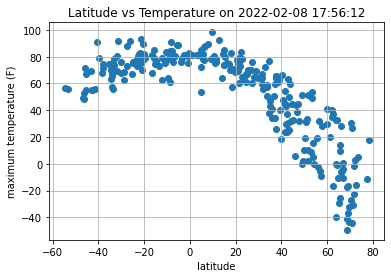

In [16]:
# lat vs temp basic plot
x_lat = city_df['lat']
y_maxtemp = city_df['max temp']
plt.scatter(x_lat, y_maxtemp)

# titles, labels, and design elements
plt.title(f'Latitude vs Temperature on {run_date}')
plt.xlabel('latitude')
plt.ylabel('maximum temperature (F)')
plt.grid()

# display plot
plt.show()

In [17]:
# export .png to file
plt.savefig("../output_data/LatVsTemp.png")

<Figure size 432x288 with 0 Axes>

## Latitude vs. Humidity Plot

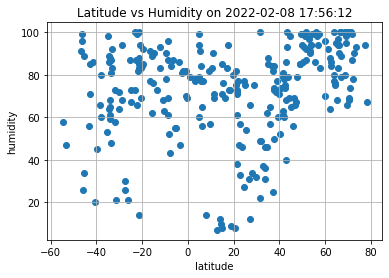

In [18]:
# lat vs temp basic plot
x_lat = city_df['lat']
y_humidity = city_df['humidity']
plt.scatter(x_lat, y_humidity)

# titles, labels, and design elements
plt.title(f'Latitude vs Humidity on {run_date}')
plt.xlabel('latitude')
plt.ylabel('humidity')
plt.grid()

# display plot
plt.show()

In [19]:
# export .png to file
plt.savefig("../output_data/LatVsHumidity.png")

<Figure size 432x288 with 0 Axes>

## Latitude vs. Cloudiness Plot

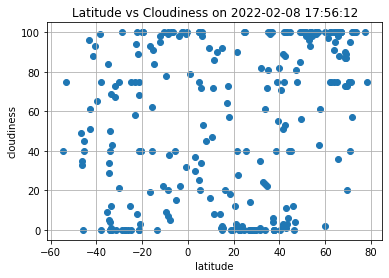

In [20]:
# lat vs temp basic plot
x_lat = city_df['lat']
y_cloudiness = city_df['cloudiness']
plt.scatter(x_lat, y_cloudiness)

# titles, labels, and design elements
plt.title(f'Latitude vs Cloudiness on {run_date}')
plt.xlabel('latitude')
plt.ylabel('cloudiness')
plt.grid()

# display plot
plt.show()

In [21]:
# export .png to file
plt.savefig("../output_data/LatVsCloudiness.png")

<Figure size 432x288 with 0 Axes>

## Latitude vs. Wind Speed Plot

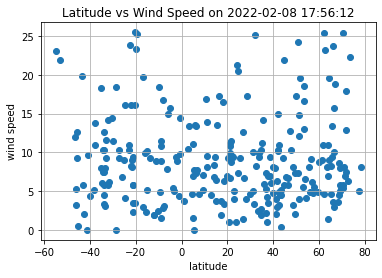

In [22]:
# lat vs temp basic plot
x_lat = city_df['lat']
y_windspeed = city_df['wind speed']
plt.scatter(x_lat, y_windspeed)

# titles, labels, and design elements
plt.title(f'Latitude vs Wind Speed on {run_date}')
plt.xlabel('latitude')
plt.ylabel('wind speed')
plt.grid()

# display plot
plt.show()

In [23]:
# export .png to file
plt.savefig("../output_data/LatVsWindSpeed.png")

<Figure size 432x288 with 0 Axes>

## Linear Regression

In [25]:
northern_df = city_df.loc[city_df['lat'] > 0]
southern_df = city_df.loc[city_df['lat'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between latitude and max temperature(F) in the Northern Hemisphere is -0.8751838429355913



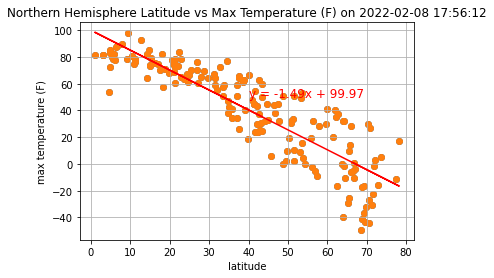

In [29]:
# lat vs temp basic plot
x_lat_north = northern_df['lat']
y_maxtemp_north = northern_df['max temp']
plt.scatter(x_lat_north, y_maxtemp_north)

# titles, labels, and design elements
plt.title(f'Northern Hemisphere Latitude vs Max Temperature (F) on {run_date}')
plt.xlabel('latitude')
plt.ylabel('max temperature (F)')
plt.grid()

# linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_lat_north, y_maxtemp_north)
regress_values = x_lat_north * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_lat_north, y_maxtemp_north)
plt.plot(x_lat_north,regress_values,"r-")

plt.annotate(line_eq,(40, 50),fontsize=12,color="red")

print(f"The correlation between latitude and max temperature(F) in the Northern Hemisphere is {rvalue}")
print("")

# display plot
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between latitude and max temperature(F) in the Southern Hemisphere is 0.5740337000763197



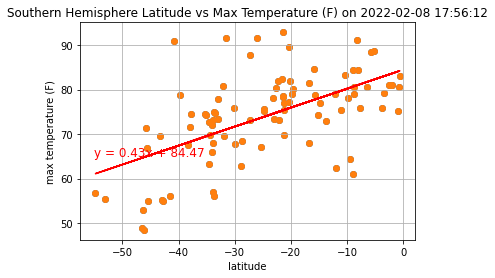

In [28]:
# lat vs temp basic plot
x_lat_south = southern_df['lat']
y_maxtemp_south = southern_df['max temp']
plt.scatter(x_lat_south, y_maxtemp_south)

# titles, labels, and design elements
plt.title(f'Southern Hemisphere Latitude vs Max Temperature (F) on {run_date}')
plt.xlabel('latitude')
plt.ylabel('max temperature (F)')
plt.grid()

# linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_lat_south, y_maxtemp_south)
regress_values = x_lat_south * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_lat_south, y_maxtemp_south)
plt.plot(x_lat_south,regress_values,"r-")

plt.annotate(line_eq,(-55, 65),fontsize=12,color="red")

print(f"The correlation between latitude and max temperature(F) in the Southern Hemisphere is {rvalue}")
print("")

# display plot
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between latitude and humidity is 0.4471987080568363



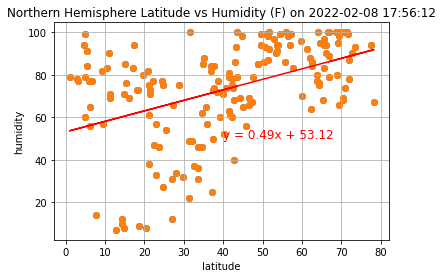

In [30]:
# lat vs temp basic plot
x_lat_north = northern_df['lat']
y_humidity_north = northern_df['humidity']
plt.scatter(x_lat_north, y_humidity_north)

# titles, labels, and design elements
plt.title(f'Northern Hemisphere Latitude vs Humidity (F) on {run_date}')
plt.xlabel('latitude')
plt.ylabel('humidity')
plt.grid()

# linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_lat_north, y_humidity_north)
regress_values = x_lat_north * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_lat_north, y_humidity_north)
plt.plot(x_lat_north,regress_values,"r-")

plt.annotate(line_eq,(40, 50),fontsize=12,color="red")

print(f"The correlation between latitude and humidity is {rvalue}")
print("")

# display plot
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between latitude and max temperature (F) is 0.15349665747585206



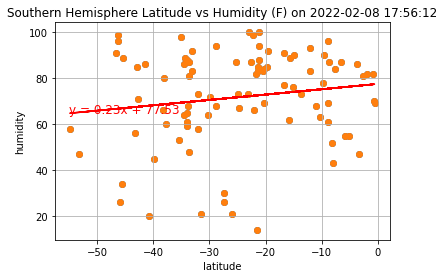

In [31]:
# lat vs temp basic plot
x_lat_south = southern_df['lat']
y_humidity_south = southern_df['humidity']
plt.scatter(x_lat_south, y_humidity_south)

# titles, labels, and design elements
plt.title(f'Southern Hemisphere Latitude vs Humidity (F) on {run_date}')
plt.xlabel('latitude')
plt.ylabel('humidity')
plt.grid()

# linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_lat_south, y_humidity_south)
regress_values = x_lat_south * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_lat_south, y_humidity_south)
plt.plot(x_lat_south,regress_values,"r-")

plt.annotate(line_eq,(-55, 65),fontsize=12,color="red")

print(f"The correlation between latitude and max temperature (F) is {rvalue}")
print("")

# display plot
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between latitude and cloudiness is 0.44404654154501616



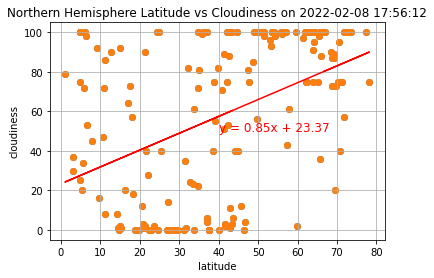

In [32]:
# lat vs temp basic plot
x_lat_north = northern_df['lat']
y_cloudiness_north = northern_df['cloudiness']
plt.scatter(x_lat_north, y_cloudiness_north)

# titles, labels, and design elements
plt.title(f'Northern Hemisphere Latitude vs Cloudiness on {run_date}')
plt.xlabel('latitude')
plt.ylabel('cloudiness')
plt.grid()

# linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_lat_north, y_cloudiness_north)
regress_values = x_lat_north * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_lat_north, y_cloudiness_north)
plt.plot(x_lat_north,regress_values,"r-")

plt.annotate(line_eq,(40, 50),fontsize=12,color="red")

print(f"The correlation between latitude and cloudiness is {rvalue}")
print("")

# display plot
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between latitude and cloudiness is 0.2073461240583603



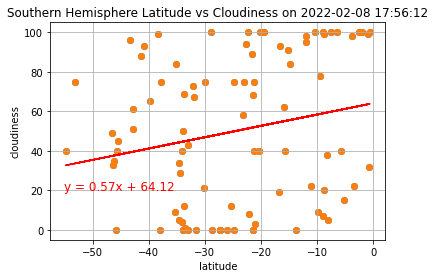

In [33]:
# lat vs temp basic plot
x_lat_south = southern_df['lat']
y_cloudiness_south = southern_df['cloudiness']
plt.scatter(x_lat_south, y_cloudiness_south)

# titles, labels, and design elements
plt.title(f'Southern Hemisphere Latitude vs Cloudiness on {run_date}')
plt.xlabel('latitude')
plt.ylabel('cloudiness')
plt.grid()

# linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_lat_south, y_cloudiness_south)
regress_values = x_lat_south * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_lat_south, y_cloudiness_south)
plt.plot(x_lat_south,regress_values,"r-")

plt.annotate(line_eq,(-55, 20),fontsize=12,color="red")

print(f"The correlation between latitude and cloudiness is {rvalue}")
print("")

# display plot
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between latitude and wind speed is 0.12110480956665341



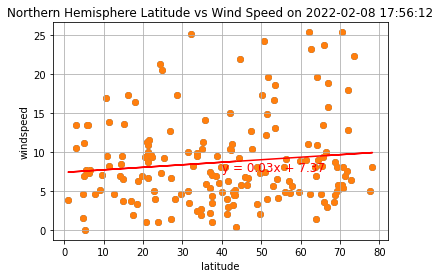

In [34]:
# lat vs temp basic plot
x_lat_north = northern_df['lat']
y_windspeed_north = northern_df['wind speed']
plt.scatter(x_lat_north, y_windspeed_north)

# titles, labels, and design elements
plt.title(f'Northern Hemisphere Latitude vs Wind Speed on {run_date}')
plt.xlabel('latitude')
plt.ylabel('windspeed')
plt.grid()

# linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_lat_north, y_windspeed_north)
regress_values = x_lat_north * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_lat_north, y_windspeed_north)
plt.plot(x_lat_north,regress_values,"r-")

plt.annotate(line_eq,(40, 7.5),fontsize=12,color="red")

print(f"The correlation between latitude and wind speed is {rvalue}")
print("")

# display plot
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between latitude and wind speed is -0.05365419352318824



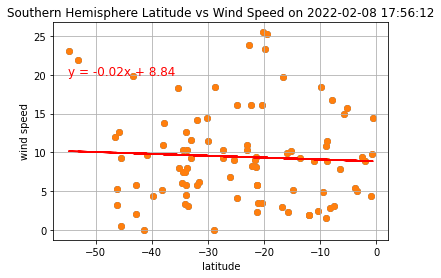

In [35]:
# lat vs temp basic plot
x_lat_south = southern_df['lat']
y_windspeed_south = southern_df['wind speed']
plt.scatter(x_lat_south, y_windspeed_south)

# titles, labels, and design elements
plt.title(f'Southern Hemisphere Latitude vs Wind Speed on {run_date}')
plt.xlabel('latitude')
plt.ylabel('wind speed')
plt.grid()

# linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_lat_south, y_windspeed_south)
regress_values = x_lat_south * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_lat_south, y_windspeed_south)
plt.plot(x_lat_south,regress_values,"r-")

plt.annotate(line_eq,(-55, 20),fontsize=12,color="red")

print(f"The correlation between latitude and wind speed is {rvalue}")
print("")

# display plot
plt.show()